# Predict Pneumonia with Chest X Ray Images Using a CNN

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image

### Organizing the paths

In [2]:
#setting up the main folder

main_fol = "data/"

In [3]:
#train, test folders

train_folder = os.path.join(main_fol, "train")
test_folder = os.path.join(main_fol, "test")
val_folder = os.path.join(main_fol, "val")


In [4]:
#pneumonia and normal image paths

pneumonia_train_images = glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_folder+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_folder+"/NORMAL/*.jpeg")

pneumonia_val_images = glob.glob(val_folder+"/PNEUMONIA/*.jpeg")
normal_val_images = glob.glob(val_folder+"/NORMAL/*.jpeg")

In [5]:
pneumonia_train_class = []
normal_train_class = []
pneumonia_train_image = []
normal_train_image = []

for x in pneumonia_train_images :
    pneumonia_train_class.append("Pneumonia")
    pneumonia_train_image.append(x)
for y in normal_train_images :
    pneumonia_train_class.append("Normal")
    pneumonia_train_image.append(y)    

pneumonia_train_dict = { "class" : pneumonia_train_class,
                         "image" : pneumonia_train_image
    
}

df_train = pd.DataFrame(pneumonia_train_dict)
df_train.tail()

,class,image
5211,Normal,data/train/NORMAL\NORMAL2-IM-1406-0001.jpeg
5212,Normal,data/train/NORMAL\NORMAL2-IM-1412-0001.jpeg
5213,Normal,data/train/NORMAL\NORMAL2-IM-1419-0001.jpeg
5214,Normal,data/train/NORMAL\NORMAL2-IM-1422-0001.jpeg
5215,Normal,data/train/NORMAL\NORMAL2-IM-1423-0001.jpeg


In [6]:
pneumonia_test_class = []
normal_test_class = []
pneumonia_test_image = []
normal_test_image = []

for x in pneumonia_test_images :
    pneumonia_test_class.append("Pneumonia")
    pneumonia_test_image.append(x)
for y in normal_test_images :
    pneumonia_test_class.append("Normal")
    pneumonia_test_image.append(y)    

pneumonia_test_dict = { "class" : pneumonia_test_class,
                         "image" : pneumonia_test_image
    
}

df_test = pd.DataFrame(pneumonia_test_dict)
df_test.tail()

,class,image
619,Normal,data/test/NORMAL\NORMAL2-IM-0374-0001.jpeg
620,Normal,data/test/NORMAL\NORMAL2-IM-0376-0001.jpeg
621,Normal,data/test/NORMAL\NORMAL2-IM-0378-0001.jpeg
622,Normal,data/test/NORMAL\NORMAL2-IM-0380-0001.jpeg
623,Normal,data/test/NORMAL\NORMAL2-IM-0381-0001.jpeg


In [7]:
pneumonia_val_class = []
pneumonia_val_image = []


for x in pneumonia_val_images :
    pneumonia_val_class.append("Pneumonia")
    pneumonia_val_image.append(x)
for y in normal_val_images :
    pneumonia_val_class.append("Normal")
    pneumonia_val_image.append(y)    

pneumonia_val_dict = { "class" : pneumonia_val_class,
                       "image" : pneumonia_val_image
    
}

df_val = pd.DataFrame(pneumonia_val_dict)
df_val.tail()

,class,image
11,Normal,data/val/NORMAL\NORMAL2-IM-1436-0001.jpeg
12,Normal,data/val/NORMAL\NORMAL2-IM-1437-0001.jpeg
13,Normal,data/val/NORMAL\NORMAL2-IM-1438-0001.jpeg
14,Normal,data/val/NORMAL\NORMAL2-IM-1440-0001.jpeg
15,Normal,data/val/NORMAL\NORMAL2-IM-1442-0001.jpeg


In [8]:
df_train["class"].value_counts()

class
Pneumonia    3875
Normal       1341
Name: count, dtype: int64

In [9]:
df_test

,class,image
0,Pneumonia,data/test/PNEUMONIA\person100_bacteria_475.jpeg
1,Pneumonia,data/test/PNEUMONIA\person100_bacteria_477.jpeg
2,Pneumonia,data/test/PNEUMONIA\person100_bacteria_478.jpeg
3,Pneumonia,data/test/PNEUMONIA\person100_bacteria_479.jpeg
4,Pneumonia,data/test/PNEUMONIA\person100_bacteria_480.jpeg
...,...,...
619,Normal,data/test/NORMAL\NORMAL2-IM-0374-0001.jpeg
620,Normal,data/test/NORMAL\NORMAL2-IM-0376-0001.jpeg
621,Normal,data/test/NORMAL\NORMAL2-IM-0378-0001.jpeg
622,Normal,data/test/NORMAL\NORMAL2-IM-0380-0001.jpeg


### Exploring the dataset

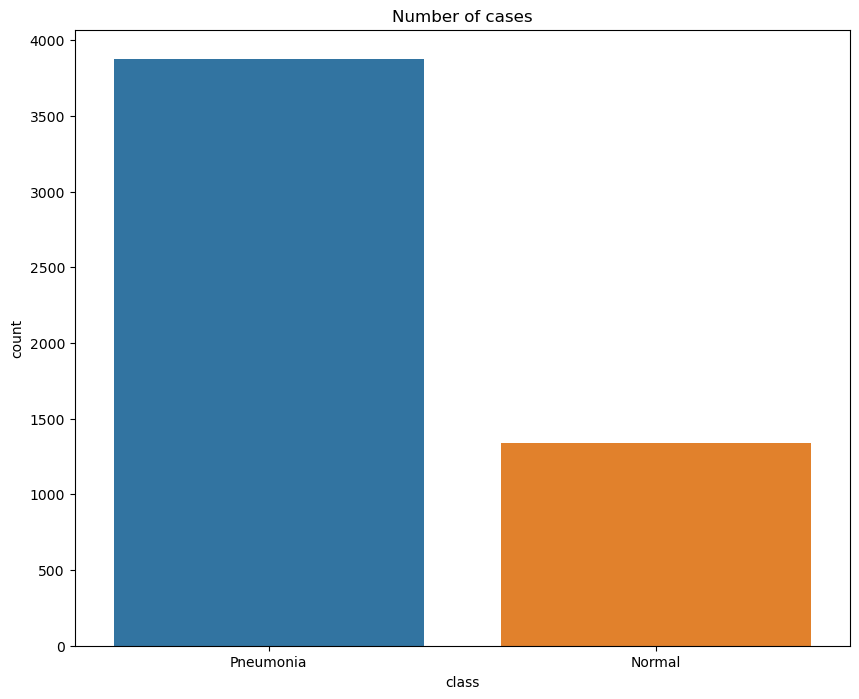

In [10]:
plt.figure(figsize=(10,8))

plt.title("Number of cases", fontsize=12)
sns.countplot(x ='class', data = df_train)

plt.show()

### Sample images

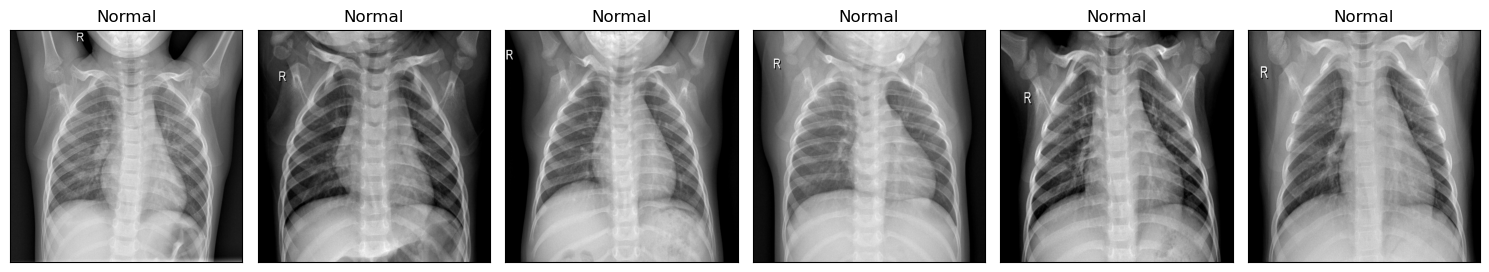

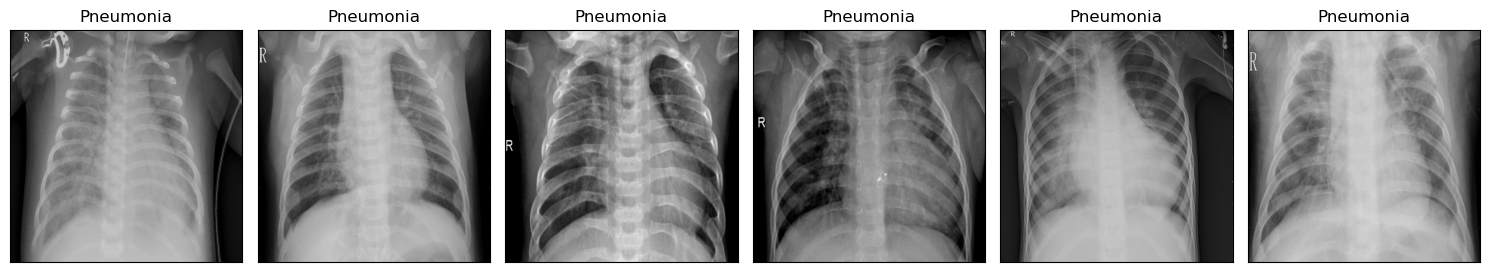

In [11]:
#normal images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#pneumonia images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Data Preparation

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
                rescale=1/255)

val_datagen = ImageDataGenerator(
                rescale=1/255)

In [14]:
train_generator = train_datagen.flow_from_dataframe(
                    df_train,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

Found 5216 validated image filenames belonging to 2 classes.


In [15]:
val_generator = val_datagen.flow_from_dataframe(
                    df_val,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    shuffle=False,
                    seed=7)

Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [16]:
#importing the necessary pacakages

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [17]:
# building the cnn

model = Sequential()

#convolution
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)))

#pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Conv
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

#2nd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

#3rd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#fully connected layer
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [18]:
#compiling
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [20]:
model_1 = model.fit(
                    train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
163/163 [==============================] - 64s 391ms/step - loss: 0.1875 - accuracy: 0.9270 - val_loss: 0.4584 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 66s 404ms/step - loss: 0.0910 - accuracy: 0.9668 - val_loss: 0.1969 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 66s 403ms/step - loss: 0.0819 - accuracy: 0.9703 - val_loss: 0.8863 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 67s 409ms/step - loss: 0.0625 - accuracy: 0.9781 - val_loss: 0.7937 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 66s 403ms/step - loss: 0.0500 - accuracy: 0.9804 - val_loss: 0.3033 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 69s 425ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.6860 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 69s 424ms/step - loss: 0.0319 - accuracy: 0.9875 - val_loss: 0.1029 - val_ac

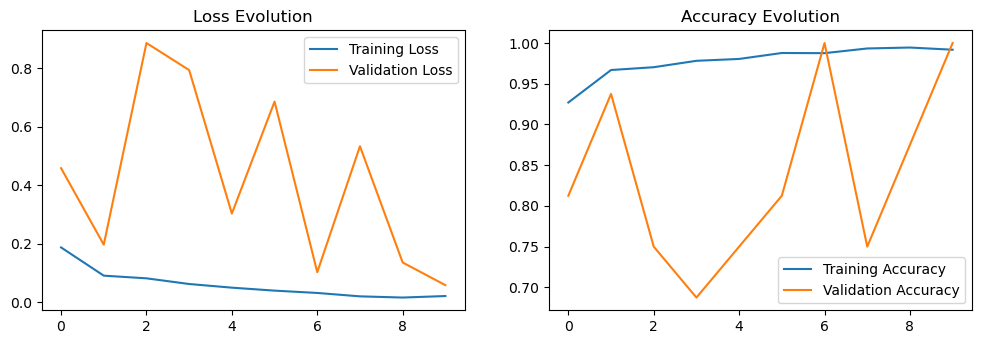

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history["loss"], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history["accuracy"], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

plt.show()

In [22]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 5s 272ms/step - loss: 1.5697 - accuracy: 0.8061
Test Accuracy: 80.61%
163/163 [==============================] - 43s 261ms/step - loss: 0.0253 - accuracy: 0.9895
Train Accuracy: 98.95%


In [23]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

20/20 [==============================] - 5s 267ms/step


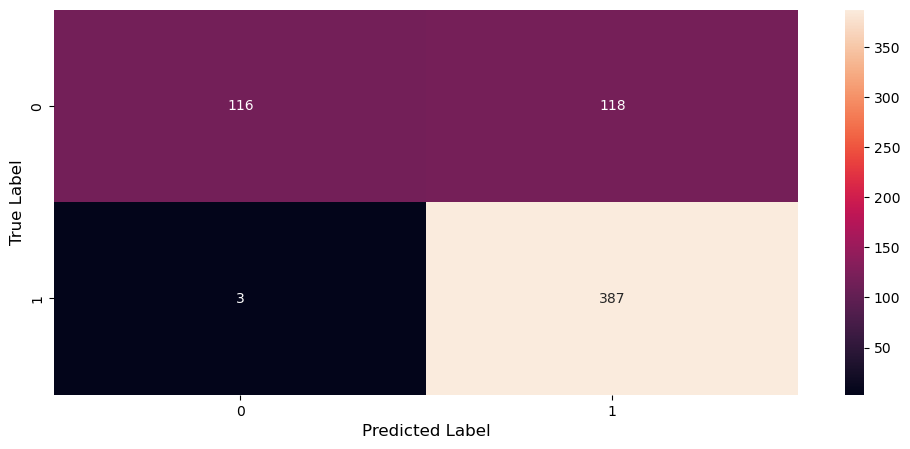

In [24]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()

In [25]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-Score: {}".format(f1_score))

Recall of the model is 0.99
Precision of the model is 0.77
F1-Score: 0.8648044692737431


Image Augmentation 

In [26]:
train_datagen_2 = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                rotation_range=10,
                fill_mode="nearest")

val_datagen = ImageDataGenerator(
              rescale = 1./255)

In [27]:
train_generator_2 = train_datagen_2.flow_from_dataframe(
    df_train,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

val_generator = val_datagen.flow_from_dataframe(
    df_val,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

test_generator = val_datagen.flow_from_dataframe(
    df_test,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7,
    shuffle=False
)

Found 5216 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Hyperparameter tuning

In [28]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, min_delta=0.0001, patience=1, verbose=1)

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(150,150,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(1, activation="sigmoid"))

In [31]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)       

In [33]:
# training the model

model_htuning = model.fit(
            train_generator_2,
            epochs=10,
            validation_data=val_generator,
            callbacks=[lr_reduce,checkpoint])

Epoch 1/10
163/163 [==============================] - ETA: 0s - loss: 0.3735 - accuracy: 0.8541
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to weights.hdf5


C:\Users\rmaji_btx\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 264s 2s/step - loss: 0.3735 - accuracy: 0.8541 - val_loss: 2.4313 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - ETA: 0s - loss: 0.2316 - accuracy: 0.9137
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 2: val_accuracy did not improve from 0.50000
163/163 [==============================] - 263s 2s/step - loss: 0.2316 - accuracy: 0.9137 - val_loss: 2.6277 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9245
Epoch 3: val_accuracy improved from 0.50000 to 0.68750, saving model to weights.hdf5
163/163 [==============================] - 262s 2s/step - loss: 0.2026 - accuracy: 0.9245 - val_loss: 0.5609 - val_accuracy: 0.6875 - lr: 1.0000e-04
Epoch 4/10
163/163 [==============================] - ETA: 0s - loss: 0.1958 - accuracy: 0.9262
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000

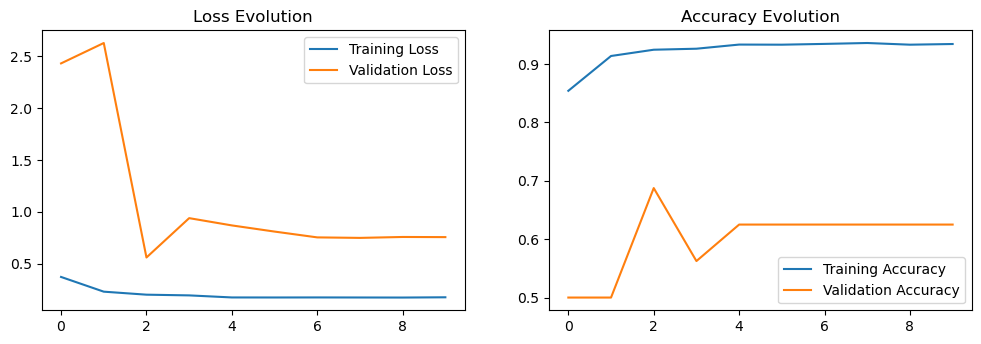

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_htuning.history['loss'], label='Training Loss')
plt.plot(model_htuning.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(model_htuning.history['accuracy'], label='Training Accuracy')
plt.plot(model_htuning.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [35]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator_2)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 18s 913ms/step - loss: 0.3476 - accuracy: 0.8846
Test Accuracy: 88.46%
163/163 [==============================] - 132s 810ms/step - loss: 0.1352 - accuracy: 0.9517
Train Accuracy: 95.17%


In [36]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

20/20 [==============================] - 13s 638ms/step


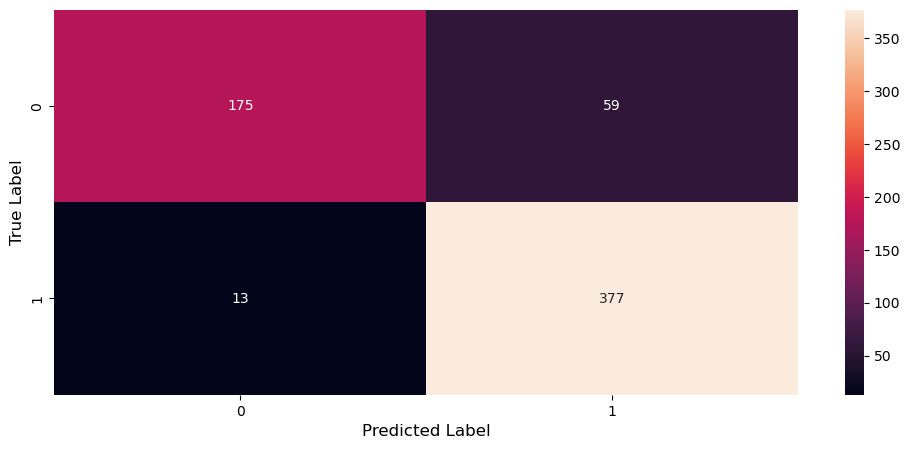

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [38]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

Recall of the model is 0.97
Precision of the model is 0.86
F1-score: 0.9128329297820823


Transfer Learning

In [39]:
from tensorflow.keras.applications import ResNet152V2

In [40]:
resnet_base_model = ResNet152V2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

resnet_base_model.summary()

234545216/234545216 [==============================] - 162s 1us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 77, 77, 64)           0         ['conv1_conv[0][0]']          
                   

                                                                                                  
 conv2_block3_preact_bn (Ba  (None, 38, 38, 256)          1024      ['conv2_block2_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 38, 38, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_blo

 rmalization)                                                                                     
                                                                                                  
 conv3_block2_1_relu (Activ  (None, 19, 19, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 21, 21, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 19, 19, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
          

 conv3_block4_3_conv (Conv2  (None, 19, 19, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 19, 19, 512)          0         ['conv3_block3_out[0][0]',    
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv3_block5_preact_bn (Ba  (None, 19, 19, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv3_block5_preact_relu (  (None, 19, 19, 512)          0         ['conv3_block5_preact_bn[0][0]
 Activatio

                                                                                                  
 conv3_block7_1_relu (Activ  (None, 19, 19, 128)          0         ['conv3_block7_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block7_2_pad (ZeroPa  (None, 21, 21, 128)          0         ['conv3_block7_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block7_2_conv (Conv2  (None, 19, 19, 128)          147456    ['conv3_block7_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv4_block1_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block1_3_conv (Conv2  (None, 10, 10, 1024)         263168    ['conv4_block1_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_out (Add)      (None, 10, 10, 1024)         0         ['conv4_block1_0_conv[0][0]', 
                                                                     'conv4_block1_3_conv[0][0]'] 
          

 conv4_block4_1_conv (Conv2  (None, 10, 10, 256)          262144    ['conv4_block4_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_1_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block4_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block4_2_pad (ZeroPa  (None, 12, 12, 256)          0         ['conv4_block4_1_relu[0][0]'] 
 dding2D) 

                                                                                                  
 conv4_block6_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block6_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 10, 10, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_out (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_conv[0][0]'] 
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block9_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_1_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block9_2_pad (ZeroPa  (None, 12, 12, 256)          0         ['conv4_block9_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block11_2_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block11_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block11_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block11_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block11_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block10_out[0][0]',   
                                                                     'conv4_block11_3_conv[0][0]']
                                                                                                  
 conv4_block12_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block11_out[0][0]']   
 atchNorma

                                                                                                  
 conv4_block14_1_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block14_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block14_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block14_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block14_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block14_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block16_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block15_out[0][0]',   
                                                                     'conv4_block16_3_conv[0][0]']
                                                                                                  
 conv4_block17_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block16_out[0][0]']   
 atchNormalization)                                                                               
          

 conv4_block19_1_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block19_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block19_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block19_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block19_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block19_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block19_2_pad[0][0]'] 
 2D)      

                                                                                                  
 conv4_block21_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block21_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block21_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block20_out[0][0]',   
                                                                     'conv4_block21_3_conv[0][0]']
                                                                                                  
 conv4_block22_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block21_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block24_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block24_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block24_2_pad[0][0]'] 
 2D)                                                                                              
          

 conv4_block26_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block26_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block26_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block25_out[0][0]',   
                                                                     'conv4_block26_3_conv[0][0]']
                                                                                                  
 conv4_block27_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block26_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block27_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block27_preact_bn[0][0
 (Activati

                                                                                                  
 conv4_block29_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block29_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block29_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block29_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block29_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block29_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block31_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block30_out[0][0]',   
                                                                     'conv4_block31_3_conv[0][0]']
                                                                                                  
 conv4_block32_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block31_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block32_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block32_preact_bn[0][0
 (Activation)                                                       ]']                           
          

 conv4_block34_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block34_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block34_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block34_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block34_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block34_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block34_2_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block34_2_conv[0][0]']
 ormalizat

                                                                                                  
 conv4_block36_3_conv (Conv  (None, 5, 5, 1024)           263168    ['conv4_block36_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_out (Add)     (None, 5, 5, 1024)           0         ['max_pooling2d_7[0][0]',     
                                                                     'conv4_block36_3_conv[0][0]']
                                                                                                  
 conv5_block1_preact_bn (Ba  (None, 5, 5, 1024)           4096      ['conv4_block36_out[0][0]']   
 tchNormalization)                                                                                
                                                                                                  
 conv5_blo

 D)                                                                 0]']                          
                                                                                                  
 conv5_block3_1_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_pad (ZeroPa  (None, 7, 7, 512)            0         ['conv5_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

In [41]:
# transfer learning network

model_tl = Sequential()
model_tl.add(resnet_base_model)
model_tl.add(Flatten())

model_tl.add(Dense(1024,activation="relu"))
model_tl.add(BatchNormalization())
model_tl.add(Dropout(rate=0.5))

model_tl.add(Dense(128,activation="relu"))
model_tl.add(BatchNormalization())
model_tl.add(Dropout(rate=0.4))

model_tl.add(Dense(1, activation="sigmoid"))

In [42]:
model_tl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              52429824  
                                                                 
 batch_normalization_3 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                      

In [43]:
#freeze initial layers of the network
resnet_base_model.trainable = False

In [44]:
model_tl.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [47]:
model_tl_final = model_tl.fit(
            train_generator_2,
            epochs=10,
            validation_data=val_generator,
            callbacks=[lr_reduce,checkpoint])

Epoch 1/10
163/163 [==============================] - ETA: 0s - loss: 0.2823 - accuracy: 0.8995
Epoch 1: val_accuracy improved from 0.68750 to 0.87500, saving model to weights.hdf5


C:\Users\rmaji_btx\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 661s 4s/step - loss: 0.2823 - accuracy: 0.8995 - val_loss: 0.3337 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9394
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 2: val_accuracy did not improve from 0.87500
163/163 [==============================] - 831s 5s/step - loss: 0.1843 - accuracy: 0.9394 - val_loss: 0.6231 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - ETA: 0s - loss: 0.1510 - accuracy: 0.9482
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 3: val_accuracy did not improve from 0.87500
163/163 [==============================] - 710s 4s/step - loss: 0.1510 - accuracy: 0.9482 - val_loss: 0.8236 - val_accuracy: 0.6875 - lr: 1.0000e-04
Epoch 4/10
163/163 [==============================] - ETA: 0s - loss: 0.1338 - accuracy: 0.9546
Epoch 4: Reduce

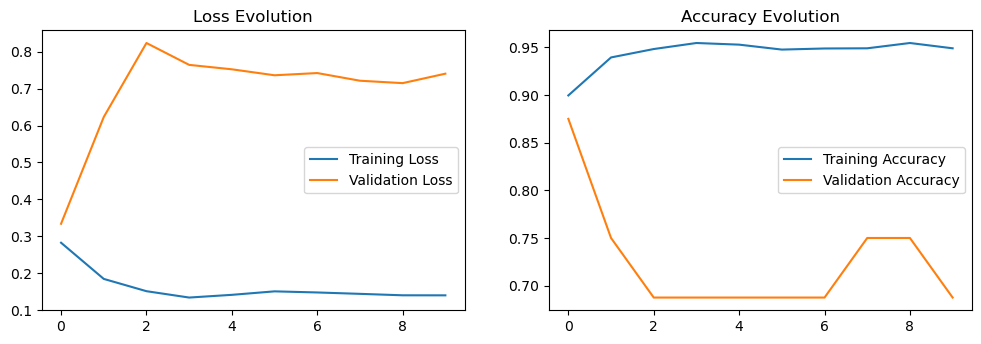

In [48]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_tl_final.history['loss'], label='Training Loss')
plt.plot(model_tl_final.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(model_tl_final.history['accuracy'], label='Training Accuracy')
plt.plot(model_tl_final.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [49]:
evaluation = model_tl.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_tl.evaluate(train_generator_2)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 69s 3s/step - loss: 0.3171 - accuracy: 0.8782
Test Accuracy: 87.82%
163/163 [==============================] - 516s 3s/step - loss: 0.0963 - accuracy: 0.9664
Train Accuracy: 96.64%


20/20 [==============================] - 65s 3s/step


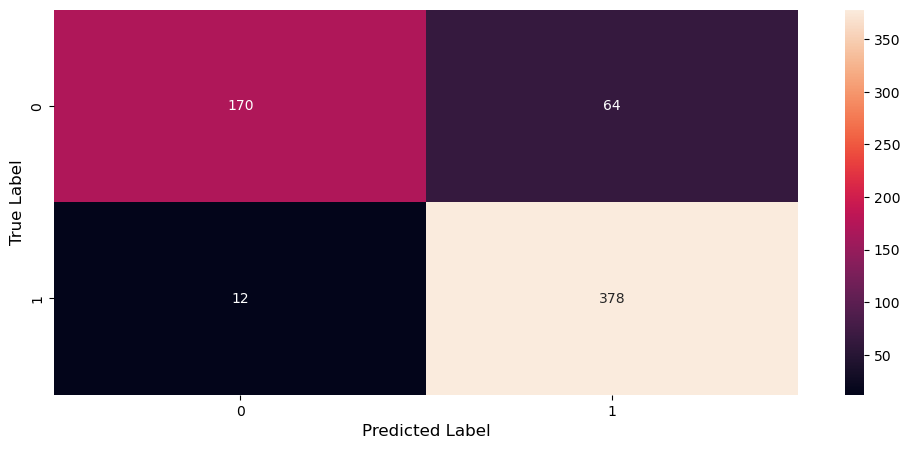

In [50]:
y_true = test_generator.classes
y_pred = (model_tl.predict(test_generator) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [51]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

Recall of the model is 0.97
Precision of the model is 0.86
F1-score: 0.9086538461538461
